In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline

### Ranking of the songs

In [2]:
ranking_df = pd.read_csv(os.path.join('raw_data','ranking_all_2017_2022.csv'), parse_dates=['Date', 'release_date'], index_col=0)
ranking_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id,release_date
0,1,Échame La Culpa,"Luis Fonsi, Demi Lovato",26459,1zsG4eaZmkA1dvjDDsAGLK,2018-01-01,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17
1,2,Corazón,"Maluma, Nego do Borel",25743,4lESS6vuruP6a79KWRaQou,2018-01-01,Ecuador,4lESS6vuruP6a79KWRaQou,2017-11-03
2,3,Déjala Que Vuelva (feat. Manuel Turizo),Piso 21,24315,33bnxcjePIkcmNjEFTJX0l,2018-01-01,Ecuador,33bnxcjePIkcmNjEFTJX0l,2017-10-20
3,4,Criminal,"Natti Natasha, Ozuna",22060,6Za3190Sbw39BBC77WSS1C,2018-01-01,Ecuador,6Za3190Sbw39BBC77WSS1C,2017-11-10
4,5,Mayores,"Becky G, Bad Bunny",18587,7JNh1cfm0eXjqFVOzKLyau,2018-01-01,Ecuador,7JNh1cfm0eXjqFVOzKLyau,2017-07-14


In [3]:
ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18750181 entries, 0 to 18199
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Position      int64         
 1   Track Name    object        
 2   Artist        object        
 3   Streams       int64         
 4   URL           object        
 5   Date          datetime64[ns]
 6   Region        object        
 7   song_id       object        
 8   release_date  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 1.4+ GB


In [4]:
ranking_df[(ranking_df['Region']=='Spain') & (ranking_df['Date']=='2020-09-01')]['Position'].nunique()

200

### Features of the songs

In [5]:
mood_features= 'danceability valence energy'.split()

In [6]:
features_df = pd.read_csv(os.path.join('raw_data','songs_features_2017_2022.csv'), index_col=0)

In [7]:
features_lite_df= features_df[mood_features+['id']]
features_lite_df.head()

,danceability,valence,energy,id
0,0.724,0.640,0.895,1zsG4eaZmkA1dvjDDsAGLK
1,0.871,0.765,0.768,4lESS6vuruP6a79KWRaQou
2,0.681,0.839,0.788,33bnxcjePIkcmNjEFTJX0l
3,0.814,0.839,0.813,6Za3190Sbw39BBC77WSS1C
4,0.743,0.871,0.855,7JNh1cfm0eXjqFVOzKLyau


In [8]:
features_lite_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108349 entries, 0 to 290
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   danceability  108349 non-null  float64
 1   valence       108349 non-null  float64
 2   energy        108349 non-null  float64
 3   id            108349 non-null  object 
dtypes: float64(3), object(1)
memory usage: 4.1+ MB


In [9]:
features_lite_df.describe()

,danceability,valence,energy
count,108349.000000,108349.000000,108349.000000
mean,0.665773,0.509908,0.638754
std,0.147276,0.225111,0.177328
min,0.000000,0.000000,0.000000
25%,0.571000,0.335000,0.530000
50%,0.682000,0.506000,0.656000
75%,0.775000,0.683000,0.768000
max,0.985000,0.992000,1.000000


In [10]:
ranking_features_df = ranking_df.merge(features_lite_df, left_on='song_id', right_on='id', how='inner')

In [11]:
ranking_features_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id,release_date,danceability,valence,energy,id
0,1,Échame La Culpa,"Luis Fonsi, Demi Lovato",26459,1zsG4eaZmkA1dvjDDsAGLK,2018-01-01,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
1,2,Échame La Culpa,"Luis Fonsi, Demi Lovato",24103,1zsG4eaZmkA1dvjDDsAGLK,2018-01-02,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
2,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",24702,1zsG4eaZmkA1dvjDDsAGLK,2018-01-03,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
3,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",24584,1zsG4eaZmkA1dvjDDsAGLK,2018-01-04,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
4,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",25531,1zsG4eaZmkA1dvjDDsAGLK,2018-01-05,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK


In [12]:
ranking_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18749500 entries, 0 to 18749499
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Position      int64         
 1   Track Name    object        
 2   Artist        object        
 3   Streams       int64         
 4   URL           object        
 5   Date          datetime64[ns]
 6   Region        object        
 7   song_id       object        
 8   release_date  datetime64[ns]
 9   danceability  float64       
 10  valence       float64       
 11  energy        float64       
 12  id            object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(6)
memory usage: 2.0+ GB


In [13]:
print("The total number of unique songs is {}".format(ranking_features_df['song_id'].nunique()))

The total number of unique songs is 108349


In [14]:
ranking_features_df.to_csv(os.path.join('generated_data', 'ranking_features.csv'))

# Preliminary plots

## Global timeseries

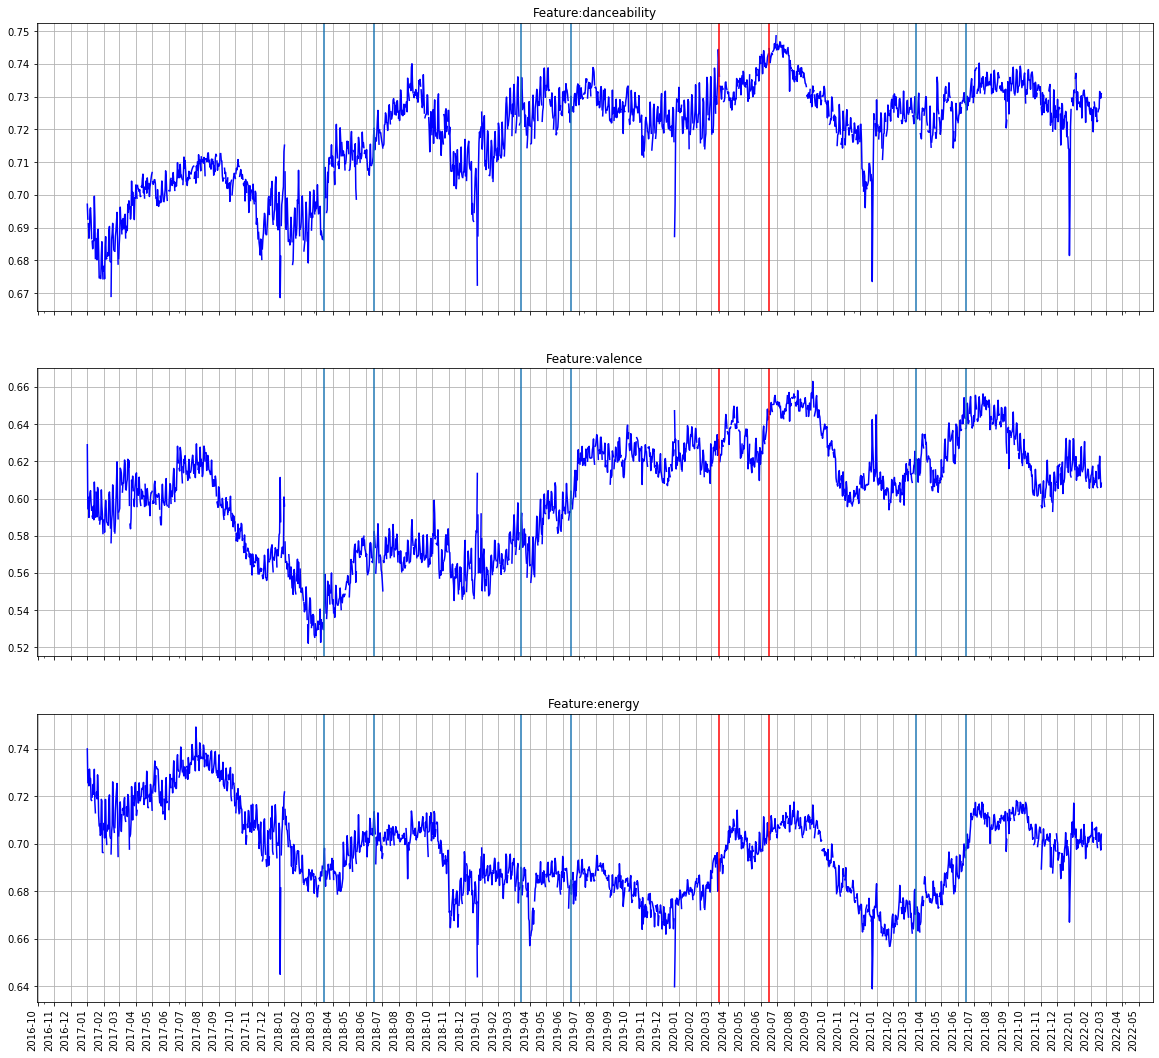

In [15]:
import matplotlib.dates as mdates
import datetime as dt


def plot_side_by_side_fn(df, features, resample_by_week=False):
    f, axes = plt.subplots(len(features), 1, figsize=(20,20), sharey='row', sharex='col')
    axe = axes.ravel()
    i=0
    for c in features:
        ts =df[c]
        if resample_by_week:
            ts= ts.resample('W-MON')
        
        ts.plot(ax= axe[i], color='blue', title='Feature:{}'.format(c), grid=True, rot=90)
        axe[i].xaxis.set_major_locator(mdates.MonthLocator())
        axe[i].axvline(dt.datetime(2020, 3, 15), color='red')
        axe[i].axvline(dt.datetime(2020, 6, 15), color='red')
        
        axe[i].axvline(dt.datetime(2021, 3, 15))
        axe[i].axvline(dt.datetime(2021, 6, 15))
        
        axe[i].axvline(dt.datetime(2019, 3, 15))
        axe[i].axvline(dt.datetime(2019, 6, 15))

        axe[i].axvline(dt.datetime(2018, 3, 15))
        axe[i].axvline(dt.datetime(2018, 6, 15))
        
        i=i+1
        
country='Spain'
country_df = ranking_features_df[ranking_features_df['Region']==country]
daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
plot_side_by_side_fn(daily_country_df, mood_features, resample_by_week=True)

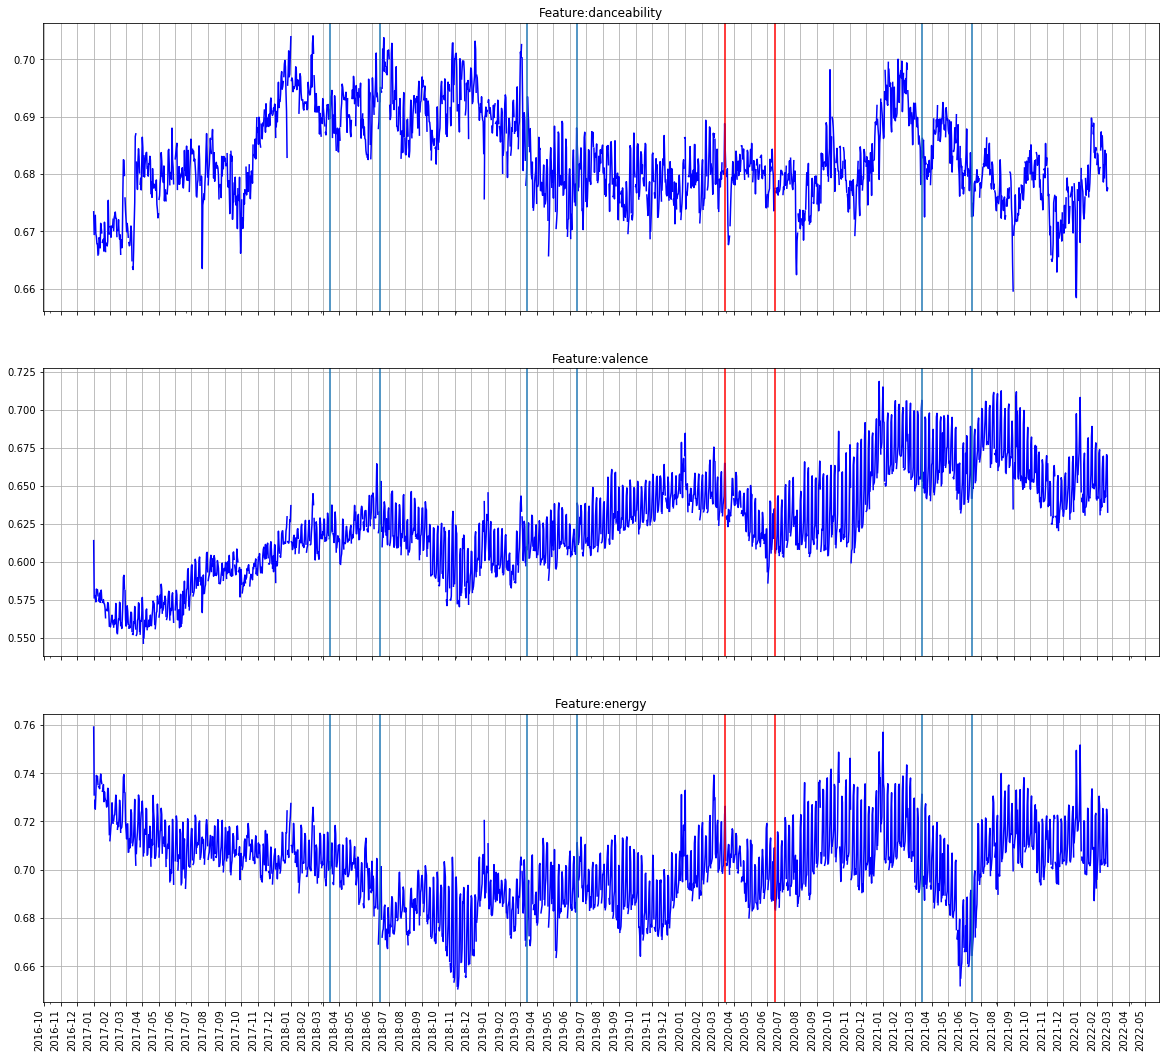

In [16]:
country='Brazil'
country_df = ranking_features_df[ranking_features_df['Region']==country]
daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
plot_side_by_side_fn(daily_country_df, mood_features, resample_by_week=True)

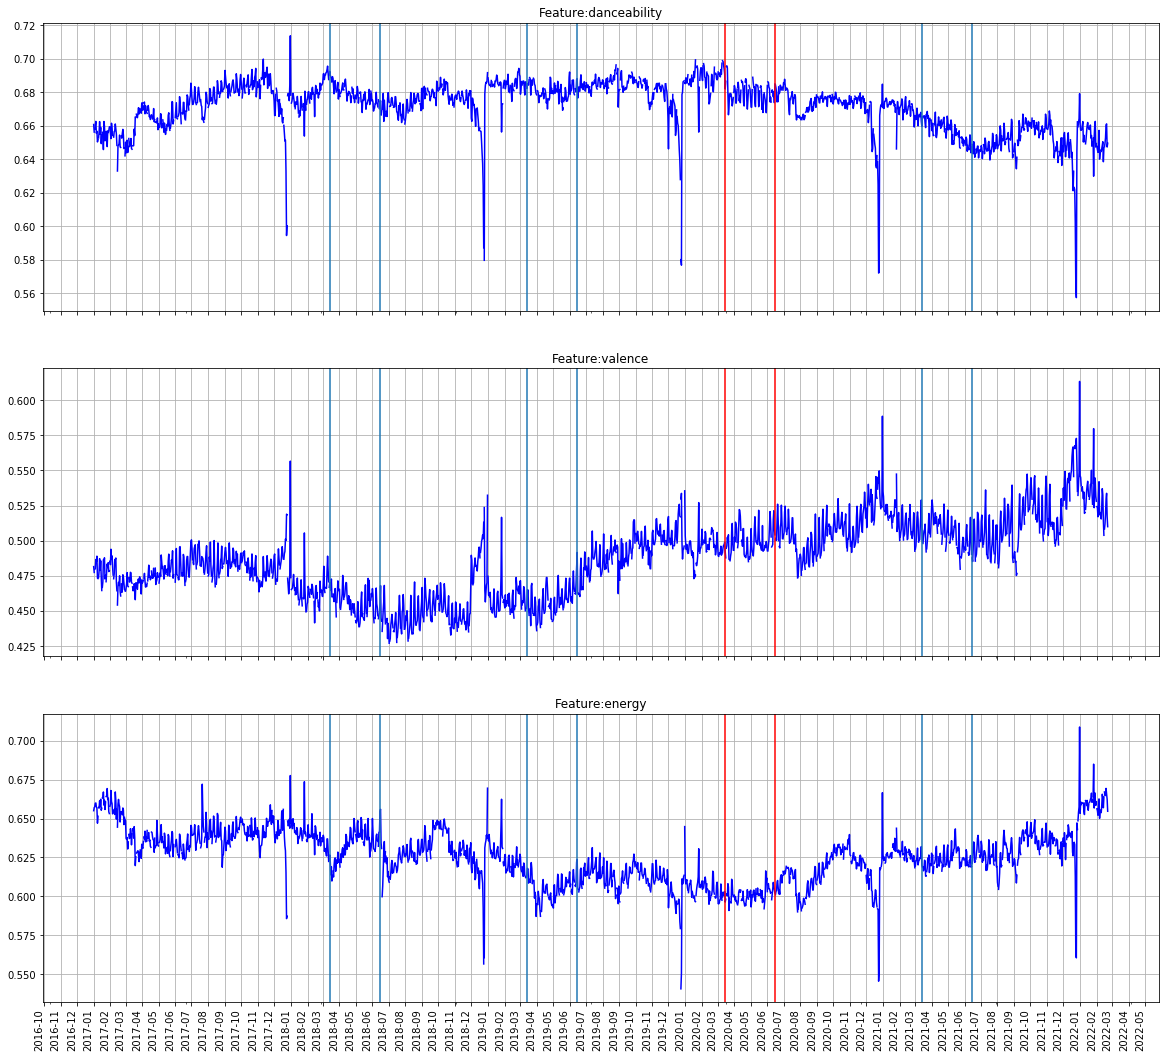

In [17]:
country='Australia'
country_df = ranking_features_df[ranking_features_df['Region']==country]
daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
plot_side_by_side_fn(daily_country_df, mood_features, resample_by_week=True)

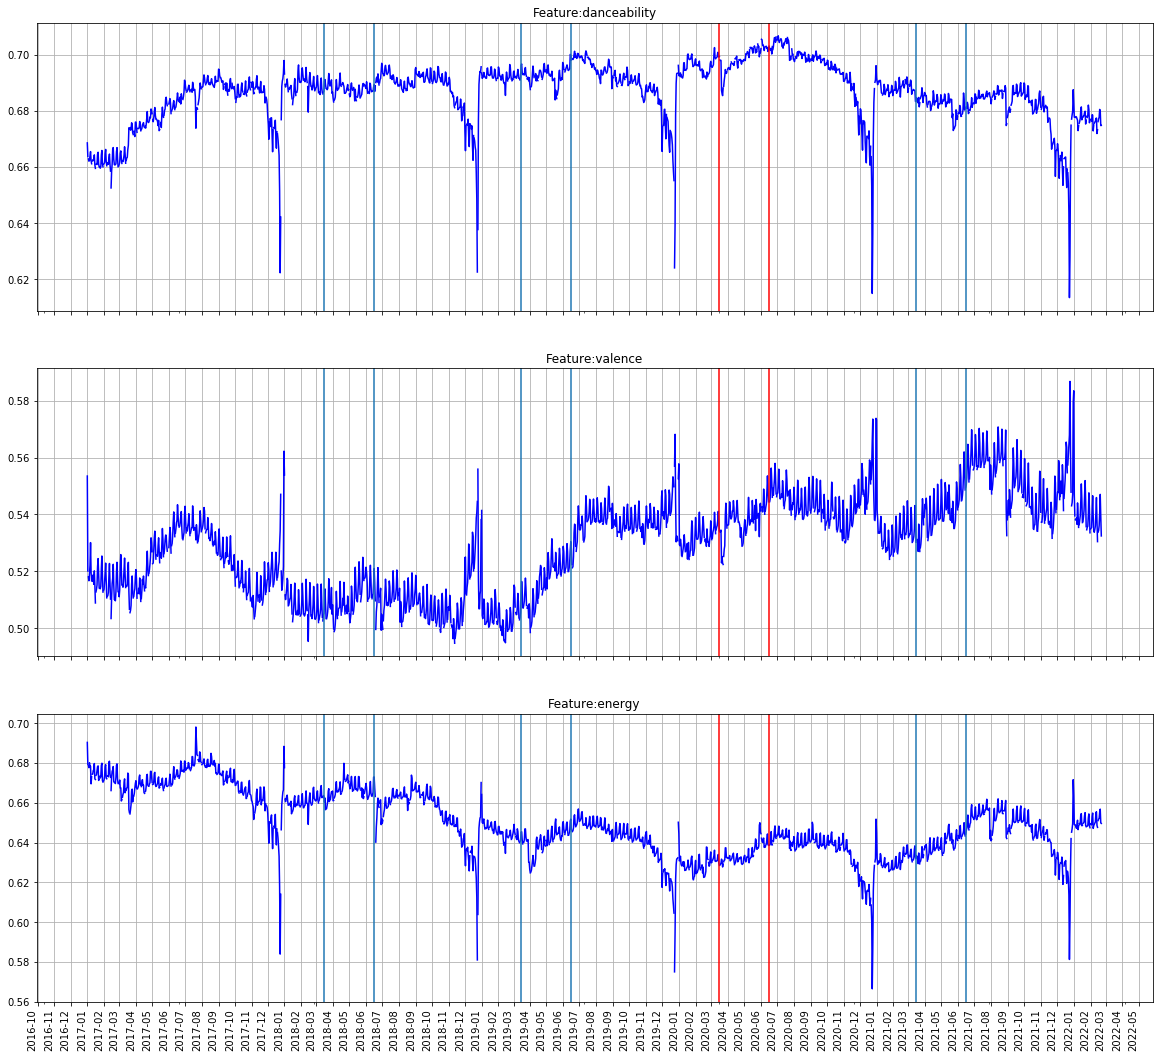

In [18]:
daily_country_df = ranking_features_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
plot_side_by_side_fn(daily_country_df, mood_features, resample_by_week=True)

## Global timeseries split by year

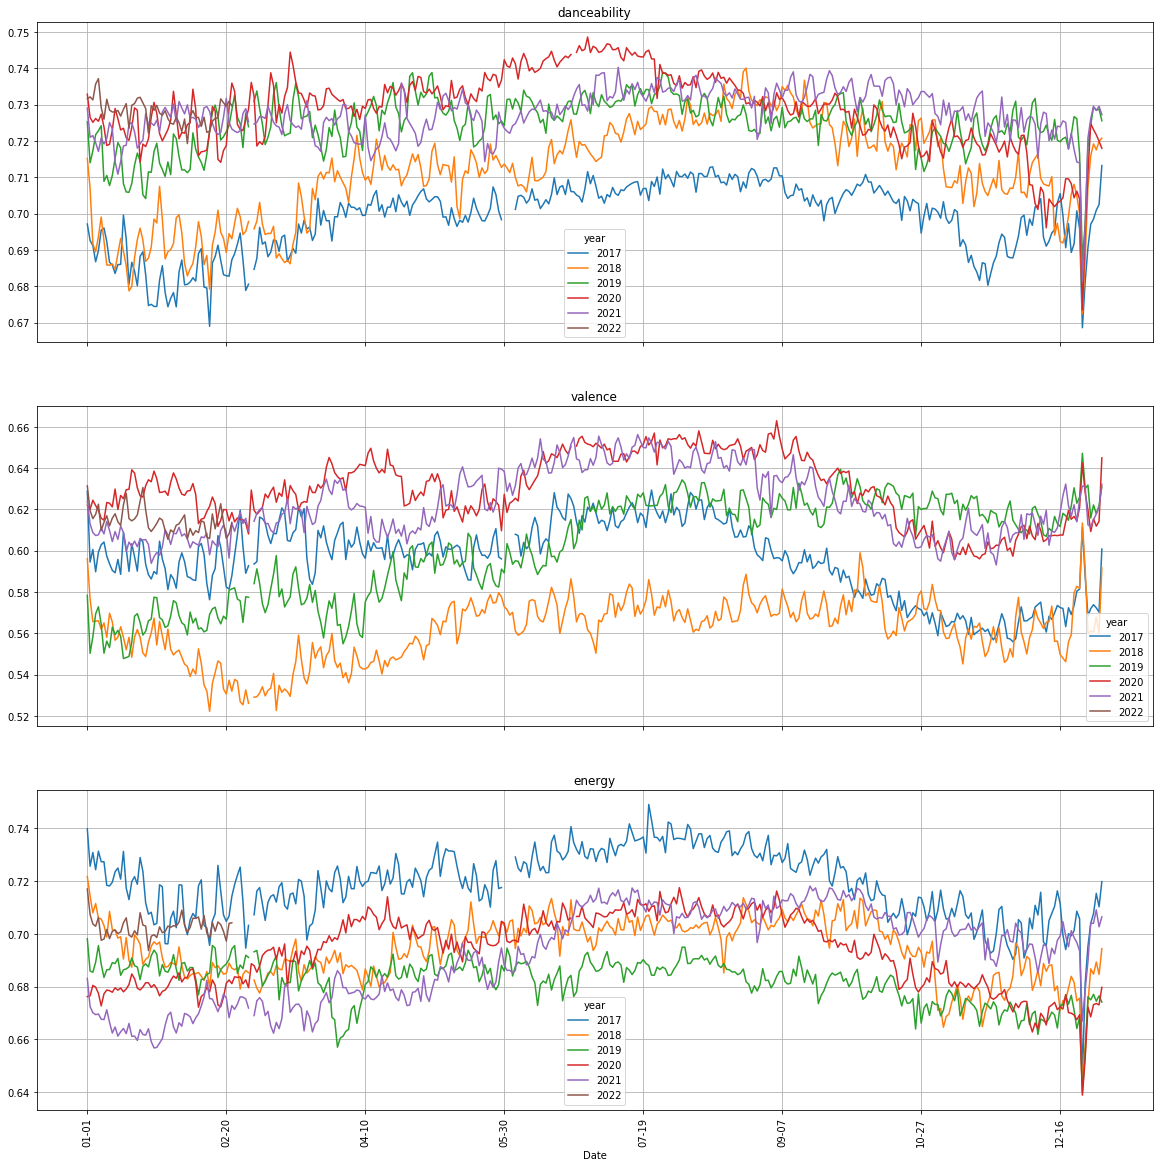

In [19]:
def plot_by_year(songs_df, features, country=None):
    
    if country != None:
        country_df = songs_df[songs_df['Region']==country]
    else:
        country_df = songs_df
    daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
    daily_country_df['year'] = daily_country_df.index.year
    daily_country_df['Date'] = daily_country_df.index.strftime('%m-%d')
    f, axes = plt.subplots(len(features), 1, figsize=(20,20), sharey='row', sharex='col')
    axe = axes.ravel()
    i=0
    for c in features:
        by_year_df = daily_country_df.set_index(['year', 'Date'])[c].unstack(-2)

        by_year_df.plot(ax= axe[i], title='{}'.format(c), grid=True, rot=90)
        i=i+1

plot_by_year(ranking_features_df, mood_features, 'Spain')

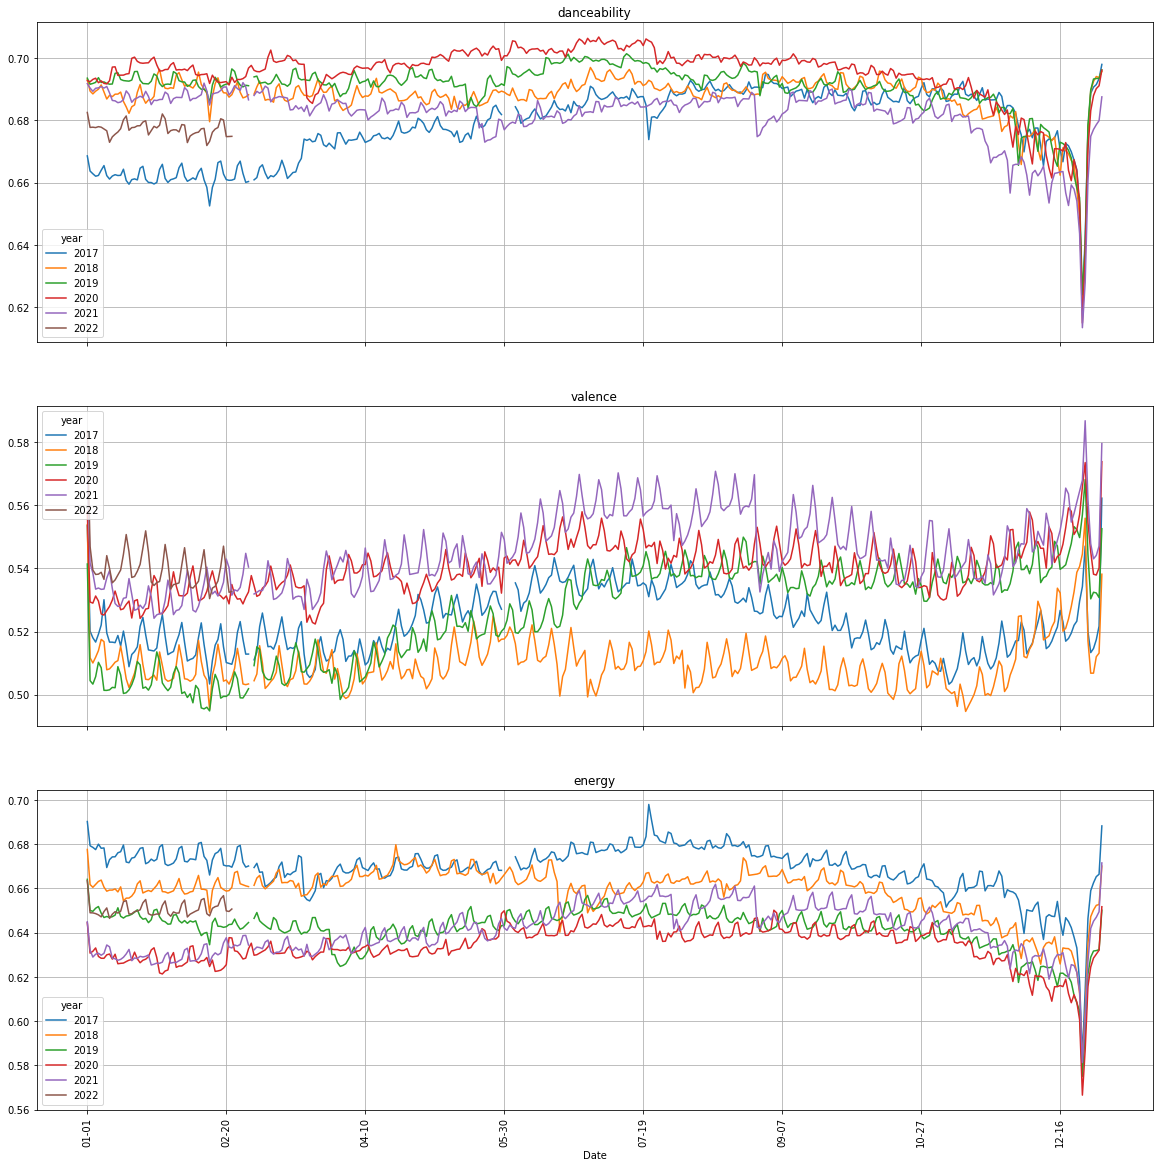

In [20]:
plot_by_year(ranking_features_df, mood_features)

## Plot with colored areas 

In [21]:
import seaborn as sns
def plot_global_by_year_and_confidence(songs_df, features):

    f, axes = plt.subplots(len(features), 1, figsize=(20,20), sharey='row', sharex='col')
    axe = axes.ravel()
    i=0
    for c in features:
        
        daily_country_df = songs_df.drop(columns='Position Streams'.split()).groupby(['Date','Region'])[c].mean().to_frame()
       
        #plt.figure(figsize = (10,5))
        axe[i].grid(True)
        axe[i].axvline(dt.datetime(2020, 3, 15), color='red')
        axe[i].axvline(dt.datetime(2020, 6, 15), color='red')
        
        axe[i].axvline(dt.datetime(2021, 3, 15))
        axe[i].axvline(dt.datetime(2021, 6, 15))
        
        axe[i].axvline(dt.datetime(2019, 3, 15))
        axe[i].axvline(dt.datetime(2019, 6, 15))

        axe[i].axvline(dt.datetime(2018, 3, 15))
        axe[i].axvline(dt.datetime(2018, 6, 15))
        
        sns.lineplot(data=daily_country_df.reset_index(), x="Date", y=c, ax=axe[i]).set_title(f'{c}');
        
        i=i+1

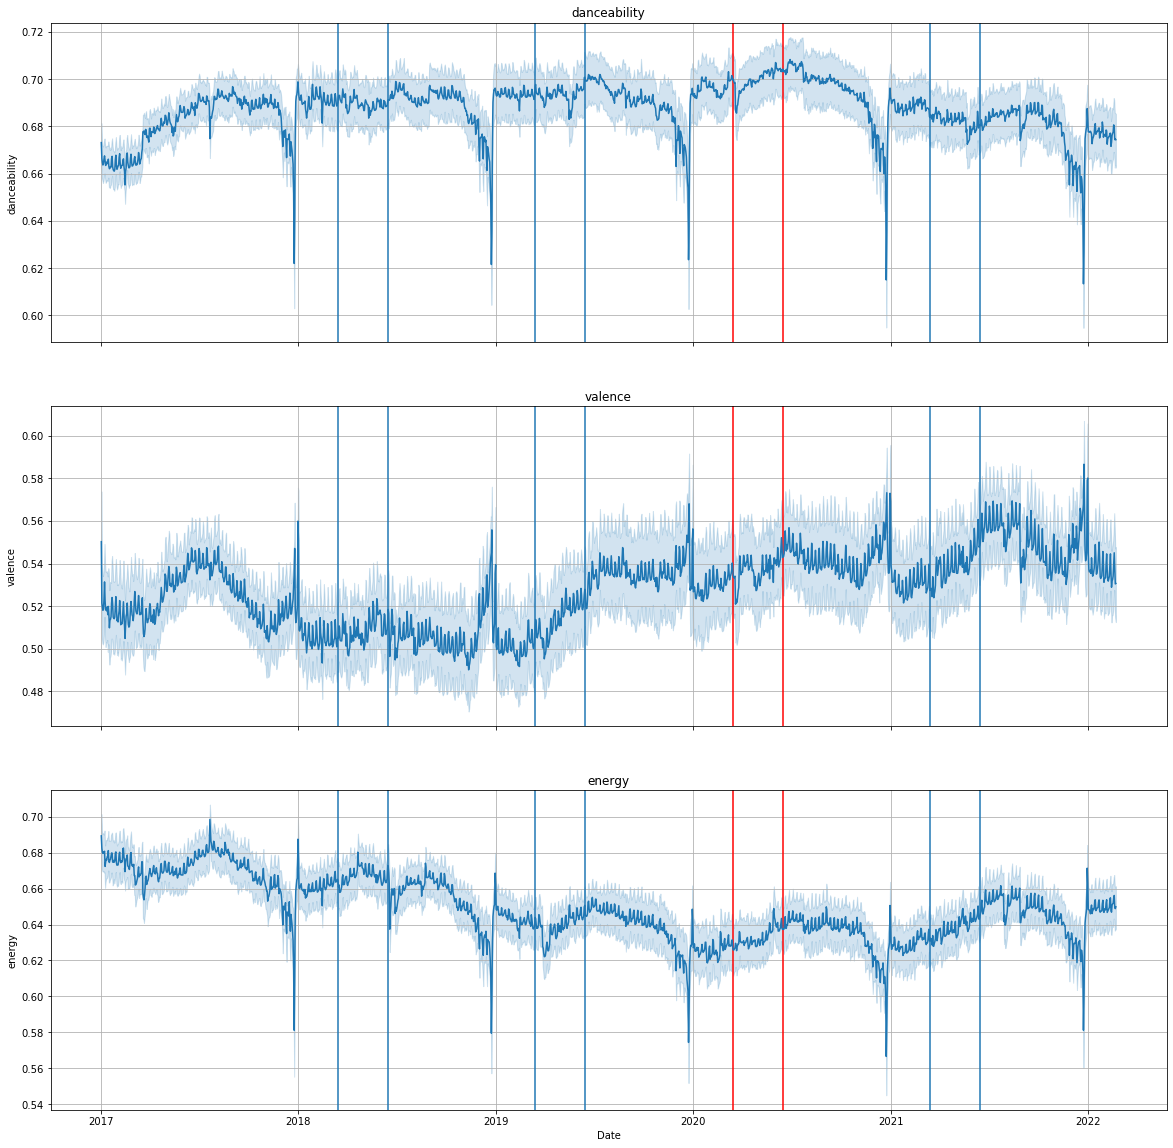

In [22]:
plot_global_by_year_and_confidence(ranking_features_df, mood_features)

In [23]:
print("That's all folks!")

That's all folks!
